In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import models, layers
import keras
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print(x_train.shape)
print(y_train.shape)
print(y_train[0:3])

(60000, 28, 28)
(60000,)
[5 0 4]


In [0]:
def data_manipulation(x_train,x_test,y_train,y_test):
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')

  x_train /= 255
  x_test /= 255


  y_train = np_utils.to_categorical(y_train, 10)
  y_test = np_utils.to_categorical(y_test, 10)

  x_train = x_train.reshape(x_train.shape[0], 28,28,1)
  x_test = x_test.reshape(x_test.shape[0], 28,28,1) 

  print(x_train.shape)
  print(x_test.shape)
  return x_train,x_test,y_train,y_test

x_train,x_test,y_train,y_test=data_manipulation(x_train,x_test,y_train,y_test)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
X_train= np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)),'constant')
X_test= np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)),'constant')

In [0]:
print(X_train.shape)
print(X_test.shape)

(60000, 32, 32, 1)
(10000, 32, 32, 1)


In [0]:
def return_model():
  model=Sequential()

  model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(32,32,1), padding='valid'))

  model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

  model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

  model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

  model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

  model.add(layers.Flatten())

  model.add(layers.Dense(84, activation='tanh'))

  model.add(layers.Dense(10, activation='softmax'))
  return model

model_mnist=return_model()
model_mnist.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"]) 
model_mnist.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_3 (Average (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_4 (Average (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 120)         48120     
_________________________________________________________________
flatten_2 (Flatten)          (None, 5880)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 84)               

In [0]:
 hist = model_mnist.fit(x=X_train,y=y_train, epochs=37, batch_size=128, validation_data=(X_test, y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/37
60000/60000 [==============================] - 92s 2ms/step - loss: 0.6915 - accuracy: 0.8286 - val_loss: 0.3442 - val_accuracy: 0.9075
Epoch 2/37
60000/60000 [==============================] - 90s 2ms/step - loss: 0.3167 - accuracy: 0.9104 - val_loss: 0.2640 - val_accuracy: 0.9276
Epoch 3/37
60000/60000 [==============================] - 90s 2ms/step - loss: 0.2564 - accuracy: 0.9275 - val_loss: 0.2218 - val_accuracy: 0.9383
Epoch 4/37
60000/60000 [==============================] - 91s 2ms/step - loss: 0.2191 - accuracy: 0.9378 - val_loss: 0.1907 - val_accuracy: 0.9472
Epoch 5/37
60000/60000 [==============================] - 90s 2ms/step - loss: 0.1925 - accuracy: 0.9448 - val_loss: 0.1709 - val_accuracy: 0.9535
Epoch 6/37
60000/60000 [==============================] - 90s 2ms/step - loss: 0.1720 - accuracy: 0.9513 - val_loss: 0.1535 - val_accuracy: 0.9569
Epoch 7/37
60000/60000 [==============================] - 90s 1ms/st

In [0]:
def plot_loss(hist):

  f, ax = plt.subplots()
  ax.plot([None] + hist.history['loss'], 'o-')
  ax.plot([None] + hist.history['val_loss'], 'x-')
  # Plot legend and use the best location automatically: loc = 0.
  ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
  ax.set_title('Training/Validation Loss per Epoch')
  
  ax.set_xlabel('Epoch')
  ax.set_ylabel('Loss') 


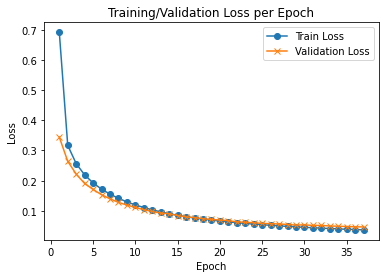

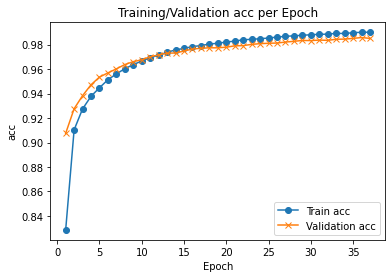

In [0]:
def plot_acc(hist):
  f, ax = plt.subplots()
  ax.plot([None] + hist.history['accuracy'], 'o-')
  ax.plot([None] + hist.history['val_accuracy'], 'x-')
  
  ax.legend(['Train acc', 'Validation acc'], loc = 0)
  ax.set_title('Training/Validation acc per Epoch')
  ax.set_xlabel('Epoch')
  ax.set_ylabel('acc')

plot_loss(hist)
plot_acc(hist) 

In [0]:
score = model_mnist.evaluate(X_test, y_test, verbose=1)
print(score)


10000/10000 [==============================] - 6s 631us/step
[0.04689216663464904, 0.9850999712944031]


In [0]:
from keras.datasets import fashion_mnist
(x_f_train,y_f_train),(x_f_test,y_f_test)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
x_f_train,x_f_test,y_f_train,y_f_test=data_manipulation(x_f_train,x_f_test,y_f_train,y_f_test)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
X_f_train= np.pad(x_f_train, ((0,0),(2,2),(2,2),(0,0)),'constant')
X_f_test= np.pad(x_f_test, ((0,0),(2,2),(2,2),(0,0)),'constant')
print(X_f_train.shape)
print(X_f_test.shape)

(60000, 32, 32, 1)
(10000, 32, 32, 1)


In [0]:
model_fashion=model_mnist

In [0]:
model_fashion.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"]) 


In [0]:
 hist_fashion = model_fashion.fit(x=X_f_train,y=y_f_train, epochs=18, batch_size=128, validation_data=(X_f_test, y_f_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/18
60000/60000 [==============================] - 90s 1ms/step - loss: 0.7485 - accuracy: 0.7368 - val_loss: 0.6030 - val_accuracy: 0.7797
Epoch 2/18
60000/60000 [==============================] - 92s 2ms/step - loss: 0.5323 - accuracy: 0.8053 - val_loss: 0.5377 - val_accuracy: 0.8097
Epoch 3/18
60000/60000 [==============================] - 90s 2ms/step - loss: 0.4794 - accuracy: 0.8276 - val_loss: 0.4947 - val_accuracy: 0.8261
Epoch 4/18
60000/60000 [==============================] - 90s 1ms/step - loss: 0.4452 - accuracy: 0.8411 - val_loss: 0.4606 - val_accuracy: 0.8370
Epoch 5/18
60000/60000 [==============================] - 90s 2ms/step - loss: 0.4220 - accuracy: 0.8491 - val_loss: 0.4582 - val_accuracy: 0.8360
Epoch 6/18
60000/60000 [==============================] - 90s 2ms/step - loss: 0.4036 - accuracy: 0.8561 - val_loss: 0.4325 - val_accuracy: 0.8478
Epoch 7/18
60000/60000 [==============================] - 90s 2ms/st

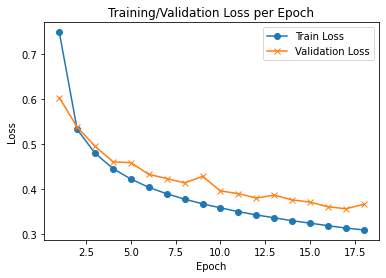

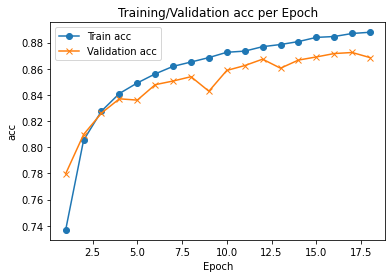

In [0]:
plot_loss(hist_fashion)
plot_acc(hist_fashion)

In [0]:
score = model_fashion.evaluate(X_f_test,y_f_test,verbose=1)
print(score)


10000/10000 [==============================] - 6s 616us/step
[0.3657845240592957, 0.8684999942779541]
